In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing

In [14]:
df = pd.read_csv("/content/bank-full.csv", sep=';')

In [15]:
print(df.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [17]:
le = preprocessing.LabelEncoder()
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'poutcome', 'y']
df[categorical_columns] = df[categorical_columns].apply(le.fit_transform)

In [18]:
X = df.drop('y', axis=1)
y = df['y']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
classifier = DecisionTreeClassifier(random_state=42, max_depth=3)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [21]:
predictions = classifier.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


In [23]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.57      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.60      0.63      9043
weighted avg       0.86      0.89      0.86      9043



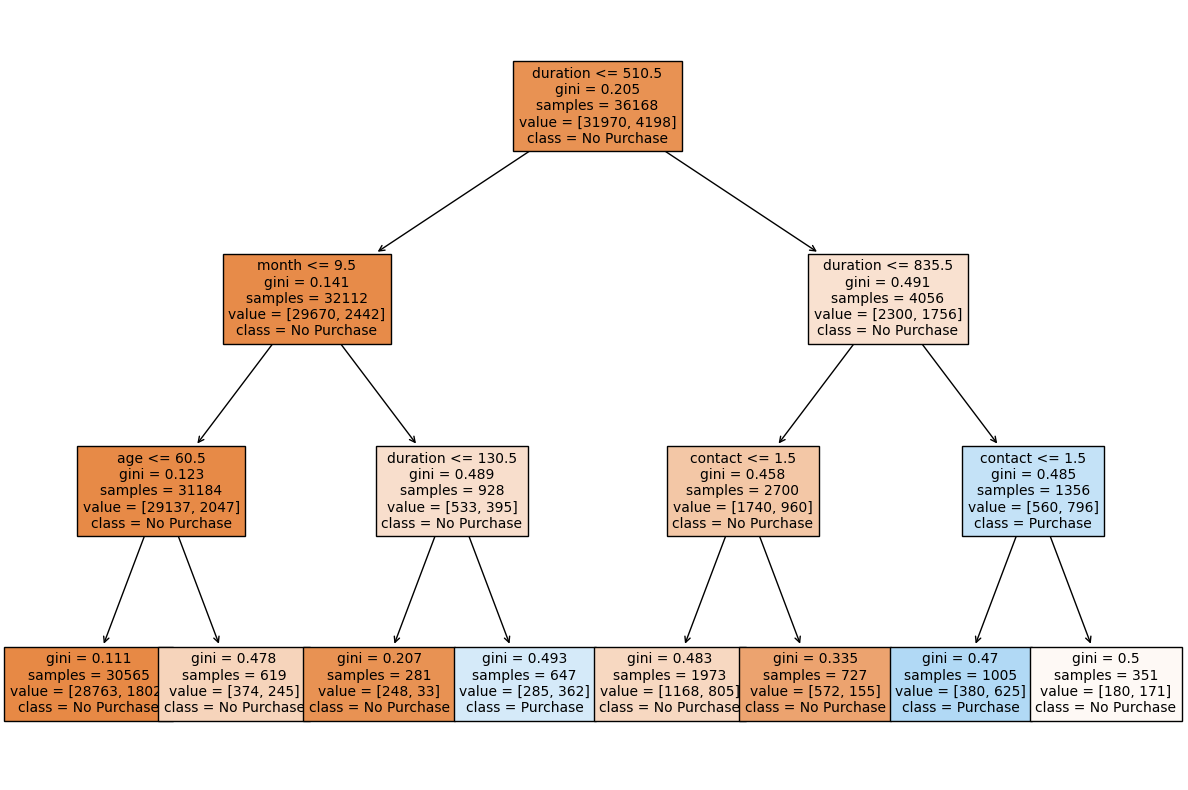

In [24]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(classifier, feature_names=list(X.columns), class_names=['No Purchase', 'Purchase'], filled=True, fontsize=10)
plt.show()